# IMPORT FILES

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import RFECV

from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

from sklearn.model_selection import GroupKFold
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# DATA EXPLORATION

In [2]:
nlp = pd.read_csv('NLP_text.csv')
fixation = pd.read_csv('fixation_all_paragraph.csv')
textRT = pd.read_csv('Overall_data_modified.csv')
gazes = pd.read_csv('Eye_data.csv')
probe = pd.read_csv('Probe_data.csv')

In [3]:
nlp

,ParaText,Paragraph,Probe,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,CD,NN,...,JJS,MD,VB,RB,VBZ,RBS,JJR,WRB,RBR,sentiment
0,one day early 1900s prominent american busines...,1,N,39,54,68.60,25,40,2,7,...,0,0,0,0,0,0,0,0,0,1
1,hopkins time one nations famous advertising ex...,2,N,73,114,46.81,40,79,1,10,...,0,0,0,0,0,0,0,0,0,-1
2,hopkins greatest contribution would helping cr...,3,N,55,96,49.01,35,74,0,11,...,1,1,1,2,0,0,0,0,0,1
3,discovered story claude hopkins years ago repo...,4,Y,81,131,50.87,50,100,0,14,...,0,0,0,6,4,0,0,0,0,1
4,hopkins start america brushing,5,N,7,11,64.37,4,8,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taking advantage quirk neurology habits wouldn...,6,N,47,73,55.54,27,52,0,8,...,0,1,1,4,0,0,0,0,0,0
6,historical outliers seemed intuit accidentally...,7,N,42,81,24.78,26,63,0,7,...,0,0,0,2,1,1,0,0,0,1
7,craving turns powers habit,8,N,10,12,95.17,4,6,0,1,...,0,0,0,0,1,0,0,0,0,0
8,hopkins signed promote pepsodent realized need...,9,N,61,84,72.87,30,53,1,8,...,0,0,1,3,0,0,0,0,0,0
9,gave appealing idea resolved advertise toothpa...,10,Y,17,25,71.31,8,16,0,4,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#EXTRACT NEEDED COLUMNS
nlp_extract = nlp[["Paragraph", "wordCount_with_stopwords", "syllableCount_with_stopwords", "ease_of_reading", "wordCount_without_stopwords", "syllableCount_without_stopwords", "CD", "NN", "JJ", "VBN", "VBP", "NNS", "VBD", "VBG", "DT", "IN", "JJS", "MD", "VB", "RB", "VBZ", "RBS", "JJR", "WRB", "RBR", "sentiment"]]
fixation_extract = fixation[["Participant", "Paragraph", "cluster_num_clusters", "cluster_avg_duration", "cluster_sd_duration", "cluster_skew_duration", "dispersion"]]
textRT_extract = textRT[['Participant', 'TextRTMean', 'Age']]
gazes_extract = gazes[['Participant', 'Paragraph', 'Gazes', 'AOIGazes', 'OffScreenGazesPix', 'OffScreenGazesProp']]
probe_extract = probe[['Participant', 'Probe', 'TUT']]

In [5]:
# textRT

In [6]:
#MERGE
textRT_gazes = pd.merge(gazes_extract, textRT_extract, on=['Participant'])

In [7]:
for column in textRT_gazes.columns:
    if column != 'Participant' and column!= 'TextRTMean':
        textRT_gazes[column] = textRT_gazes[column].fillna(0).astype(int)

textRT_gazes


,Participant,Paragraph,Gazes,AOIGazes,OffScreenGazesPix,OffScreenGazesProp,TextRTMean,Age
0,593890eac6aa16000101f037,1,699,138,181,301,8.150127,25
1,593890eac6aa16000101f037,2,727,98,260,352,8.150127,25
2,593890eac6aa16000101f037,3,947,248,220,356,8.150127,25
3,593890eac6aa16000101f037,4,799,171,282,422,8.150127,25
4,593890eac6aa16000101f037,5,163,12,4,4,8.150127,25
...,...,...,...,...,...,...,...,...
14155,63e53dc0bb780ac38cdcf77e,36,1678,1047,20,82,9.945963,34
14156,63e53dc0bb780ac38cdcf77e,37,1736,1344,62,76,9.945963,34
14157,63e53dc0bb780ac38cdcf77e,38,2825,2297,65,122,9.945963,34
14158,63e53dc0bb780ac38cdcf77e,39,387,167,12,20,9.945963,34


In [8]:
#CALCULATE gazes/second
textRT_gazes['gazes_per_sec'] = textRT_gazes['Gazes']/textRT_gazes['TextRTMean']


In [9]:
filtered_textRT_gazes = textRT_gazes[
    (textRT_gazes['TextRTMean'] >= 1) & (textRT_gazes['gazes_per_sec'] >= 5)
]

In [10]:
filtered_textRT_gazes

,Participant,Paragraph,Gazes,AOIGazes,OffScreenGazesPix,OffScreenGazesProp,TextRTMean,Age,gazes_per_sec
0,593890eac6aa16000101f037,1,699,138,181,301,8.150127,25,85.765529
1,593890eac6aa16000101f037,2,727,98,260,352,8.150127,25,89.201059
2,593890eac6aa16000101f037,3,947,248,220,356,8.150127,25,116.194501
3,593890eac6aa16000101f037,4,799,171,282,422,8.150127,25,98.035276
4,593890eac6aa16000101f037,5,163,12,4,4,8.150127,25,19.999687
...,...,...,...,...,...,...,...,...,...
14155,63e53dc0bb780ac38cdcf77e,36,1678,1047,20,82,9.945963,34,168.711676
14156,63e53dc0bb780ac38cdcf77e,37,1736,1344,62,76,9.945963,34,174.543188
14157,63e53dc0bb780ac38cdcf77e,38,2825,2297,65,122,9.945963,34,284.034853
14158,63e53dc0bb780ac38cdcf77e,39,387,167,12,20,9.945963,34,38.910261


In [11]:
#EXTRACT
filtered_textRT_gazes = filtered_textRT_gazes[['Participant', 'Paragraph', 'Gazes', 'AOIGazes', 'OffScreenGazesPix', 'OffScreenGazesProp', 'Age']]

#MERGE
textRT_gazes_nlp = pd.merge(filtered_textRT_gazes, nlp_extract, on=['Paragraph'])

textRT_gazes_nlp_fixation = pd.merge(textRT_gazes_nlp, fixation_extract, on=['Participant', 'Paragraph'])


In [12]:
textRT_gazes_nlp_fixation

,Participant,Paragraph,Gazes,AOIGazes,OffScreenGazesPix,OffScreenGazesProp,Age,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,...,RBS,JJR,WRB,RBR,sentiment,cluster_num_clusters,cluster_avg_duration,cluster_sd_duration,cluster_skew_duration,dispersion
0,593890eac6aa16000101f037,1,699,138,181,301,25,39,54,68.6,...,0,0,0,0,1,6,0.048183,0.013313,-2.332043,0.537245
1,596e1af7a09655000197d4bb,1,416,45,156,212,36,39,54,68.6,...,0,0,0,0,1,51,0.050455,0.009926,1.132722,0.508165
2,5af835d8e19f8c00019e6dc0,1,830,136,136,253,39,39,54,68.6,...,0,0,0,0,1,138,0.033606,0.020581,0.864703,0.453232
3,5b07b71c68eff50001d1c859,1,262,93,47,53,31,39,54,68.6,...,0,0,0,0,1,14,0.080571,0.035667,2.975477,0.355419
4,5bd7971b0aac450001f951aa,1,621,187,32,74,57,39,54,68.6,...,0,0,0,0,1,38,0.080797,0.015477,-3.901375,0.471612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12946,6295270587394aac7ce600db,40,241,105,4,8,58,68,91,79.6,...,0,0,0,1,1,56,0.203238,0.035341,-3.100623,0.318192
12947,63038702fea51556c37c36cf,40,336,0,232,252,34,68,91,79.6,...,0,0,0,1,1,2,0.030900,0.043699,NaN,1.000000
12948,63d17cf704d2d7053d56b962,40,751,323,24,58,22,68,91,79.6,...,0,0,0,1,1,53,0.075787,0.029010,0.355234,0.346464
12949,63d3fa78d12b38b131ef6b76,40,460,207,31,57,20,68,91,79.6,...,0,0,0,1,1,130,0.030983,0.003696,1.369901,0.315273


In [13]:
textRT_gazes_nlp_fixation.describe()

,Paragraph,Gazes,AOIGazes,OffScreenGazesPix,OffScreenGazesProp,Age,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,...,RBS,JJR,WRB,RBR,sentiment,cluster_num_clusters,cluster_avg_duration,cluster_sd_duration,cluster_skew_duration,dispersion
count,12951.00000,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,...,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,12951.000000,12662.000000,11885.000000,12951.000000
mean,20.50915,583.187244,205.601575,111.921705,143.829511,37.102540,47.268242,70.949502,63.465969,27.063856,...,0.025635,0.051039,0.101768,0.025481,0.646514,55.811829,0.053177,0.029968,0.349673,0.488773
std,11.61507,556.277205,278.491745,210.038424,234.311729,12.884302,25.023134,37.487675,14.056931,13.751221,...,0.158050,0.220085,0.302355,0.157586,0.528839,104.143095,0.118750,0.195276,1.985237,0.198424
min,1.00000,12.000000,0.000000,0.000000,0.000000,18.000000,4.000000,6.000000,24.780000,4.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,-9.300951,0.000000
25%,10.00000,233.000000,34.000000,14.000000,26.000000,28.000000,28.000000,36.000000,52.870000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.031784,0.011864,-0.921225,0.365369
50%,20.00000,431.000000,110.000000,46.000000,72.000000,34.000000,48.000000,75.000000,65.860000,28.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.042633,0.017633,0.344265,0.447335
75%,31.00000,762.000000,270.000000,126.000000,173.000000,44.000000,68.000000,96.000000,71.310000,37.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,55.000000,0.054967,0.025707,1.583055,0.578180
max,40.00000,18522.000000,5274.000000,7934.000000,9382.000000,84.000000,111.000000,159.000000,95.470000,60.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3059.000000,5.691467,13.614702,16.141648,1.000000


In [14]:
#DROP NULL VALUES
textRT_gazes_nlp_fixation = textRT_gazes_nlp_fixation.dropna()

In [15]:
textRT_gazes_nlp_fixation.describe()

,Paragraph,Gazes,AOIGazes,OffScreenGazesPix,OffScreenGazesProp,Age,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,...,RBS,JJR,WRB,RBR,sentiment,cluster_num_clusters,cluster_avg_duration,cluster_sd_duration,cluster_skew_duration,dispersion
count,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000,...,11885.000000,11885.000000,11885.000000,11885.000000,11885.00000,11885.000000,11885.000000,11885.000000,11885.000000,11885.000000
mean,20.570804,614.666470,217.796214,118.320740,152.090618,36.768952,48.210097,72.411527,63.211268,27.601935,...,0.026756,0.052840,0.104838,0.025242,0.64838,60.662684,0.054186,0.029588,0.349673,0.467236
std,11.675388,567.884671,286.566002,217.458905,242.139067,12.594682,24.848312,37.202809,14.035028,13.620876,...,0.161378,0.223723,0.306357,0.156866,0.53201,107.390571,0.123145,0.201297,1.985237,0.139795
min,1.000000,12.000000,0.000000,0.000000,0.000000,18.000000,4.000000,6.000000,24.780000,4.000000,...,0.000000,0.000000,0.000000,0.000000,-1.00000,3.000000,0.007333,0.000076,-9.300951,0.125994
25%,10.000000,258.000000,38.000000,15.000000,28.000000,27.000000,29.000000,37.000000,52.870000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,0.032778,0.011959,-0.921225,0.365681
50%,21.000000,465.000000,120.000000,50.000000,78.000000,34.000000,48.000000,75.000000,65.860000,28.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,22.000000,0.043055,0.017518,0.344265,0.440577
75%,31.000000,799.000000,290.000000,135.000000,185.000000,44.000000,68.000000,96.000000,71.310000,37.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,61.000000,0.054933,0.025042,1.583055,0.547202
max,40.000000,18522.000000,5274.000000,7934.000000,9382.000000,84.000000,111.000000,159.000000,95.470000,60.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,3059.000000,5.691467,13.614702,16.141648,1.000000


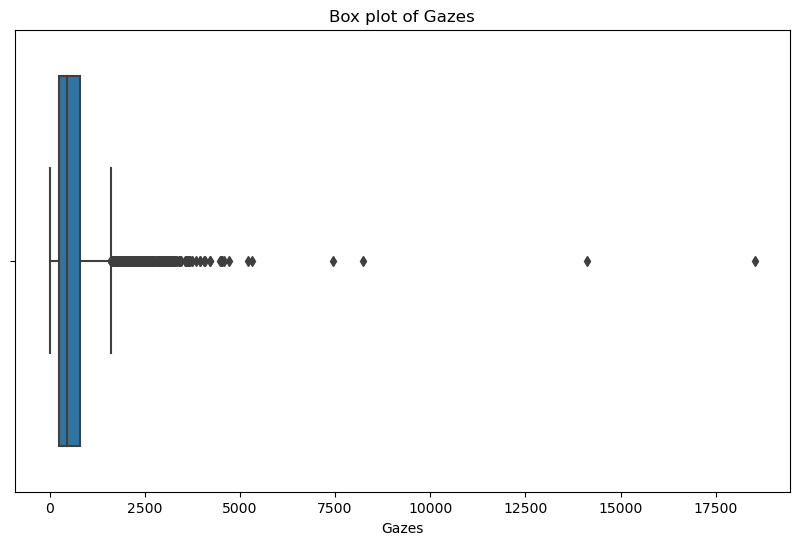

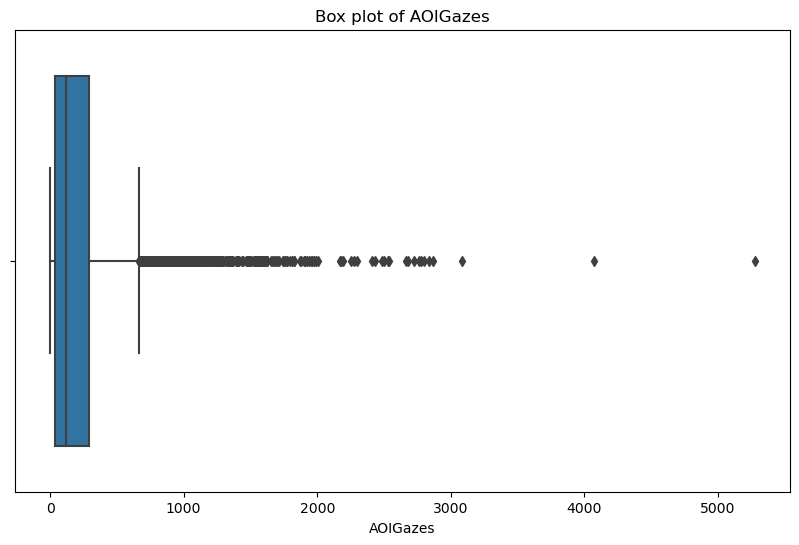

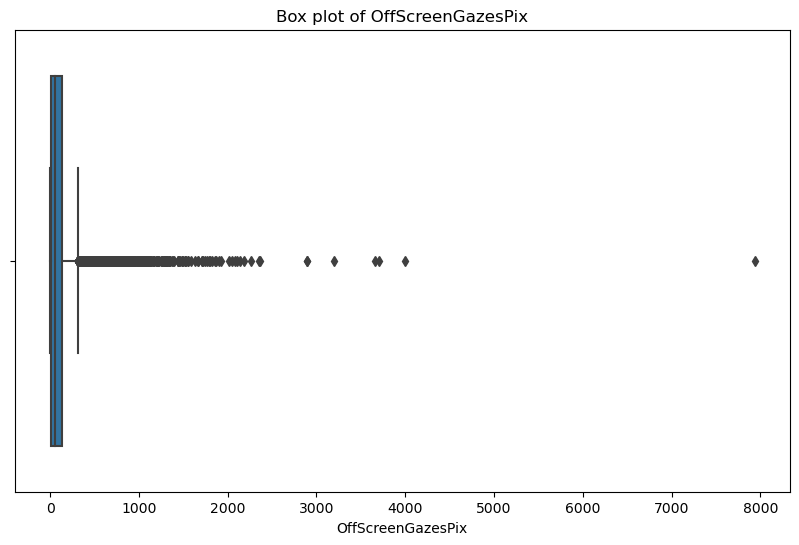

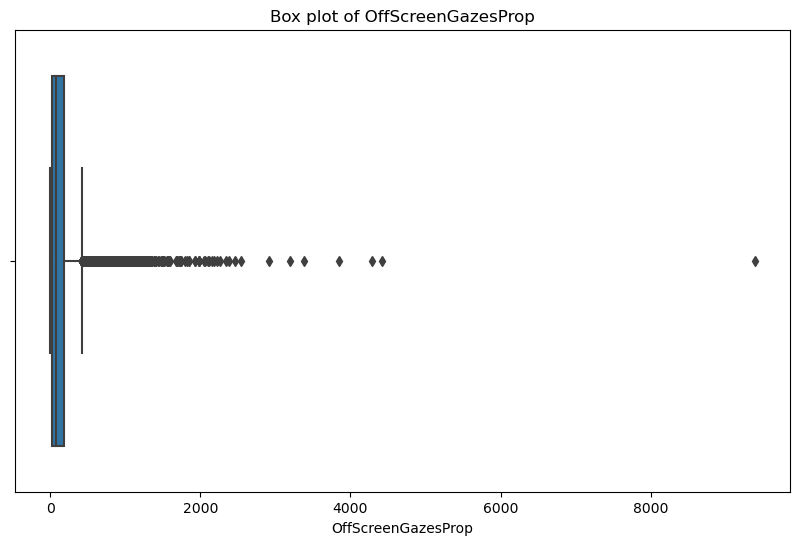

In [18]:
## Detecting outliers for Gazes, AOI, offscreen, fixations 

features = ['Gazes', 'AOIGazes', 'OffScreenGazesPix', 'OffScreenGazesProp']  
for feature in features:
    plt.figure(figsize=(10, 6))  
    sns.boxplot(x=textRT_gazes_nlp_fixation[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [16]:
#CREATE PP FOR GAZES, FIXATION AND NLP

fixation_paragraphs = [4, 10, 15, 20, 26, 31, 36]

new_data = []

for index, row in textRT_gazes_nlp_fixation.iterrows():
    if row['Paragraph'] in fixation_paragraphs:
        gazes_fixation_nlp_info = textRT_gazes_nlp_fixation[(textRT_gazes_nlp_fixation['Participant'] == row['Participant']) & (textRT_gazes_nlp_fixation['Paragraph'] == row['Paragraph'])]

        if not gazes_fixation_nlp_info.empty:
            gazes_fixation_nlp_info = gazes_fixation_nlp_info.iloc[0]
        else:
            gazes_fixation_nlp_info = None

        if row['Paragraph'] > 1:
            prev_paragraph = row['Paragraph'] - 1
            prev_gazes_fixation_nlp_info = textRT_gazes_nlp_fixation[(textRT_gazes_nlp_fixation['Participant'] == row['Participant']) & (textRT_gazes_nlp_fixation['Paragraph'] == prev_paragraph)]

            if not prev_gazes_fixation_nlp_info.empty:
                prev_gazes_fixation_nlp_info = prev_gazes_fixation_nlp_info.iloc[0]
            else:
                prev_gazes_fixation_nlp_info = None
        else:
            prev_gazes_fixation_nlp_info = None

        if row['Paragraph'] > 2:
            prev2_paragraph = row['Paragraph'] - 2
            prev2_gazes_fixation_nlp_info = textRT_gazes_nlp_fixation[(textRT_gazes_nlp_fixation['Participant'] == row['Participant']) & (textRT_gazes_nlp_fixation['Paragraph'] == prev2_paragraph)]

            if not prev2_gazes_fixation_nlp_info.empty:
                prev2_gazes_fixation_nlp_info = prev2_gazes_fixation_nlp_info.iloc[0]
            else:
                prev2_gazes_fixation_nlp_info = None
        else:
            prev2_gazes_fixation_nlp_info = None

        row_data = {
            'Participant': row['Participant'],
            'Paragraph': row['Paragraph'],
            'Age': row['Age'],
            'PP_Gazes': gazes_fixation_nlp_info['Gazes'] if gazes_fixation_nlp_info is not None else None,
            'PP_AOI_Gazes': gazes_fixation_nlp_info['AOIGazes'] if gazes_fixation_nlp_info is not None else None,
            'PP_OffscreenPix': gazes_fixation_nlp_info['OffScreenGazesPix'] if gazes_fixation_nlp_info is not None else None,
            'PP_OffscreenProp': gazes_fixation_nlp_info['OffScreenGazesProp'] if gazes_fixation_nlp_info is not None else None,
            'PP_2_Gazes': prev_gazes_fixation_nlp_info['Gazes'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_AOI_Gazes': prev_gazes_fixation_nlp_info['AOIGazes'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_OffscreenPix': prev_gazes_fixation_nlp_info['OffScreenGazesPix'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_OffscreenProp': prev_gazes_fixation_nlp_info['OffScreenGazesProp'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_3_Gazes': prev2_gazes_fixation_nlp_info['Gazes'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_AOI_Gazes': prev2_gazes_fixation_nlp_info['AOIGazes'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_OffscreenPix': prev2_gazes_fixation_nlp_info['OffScreenGazesPix'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_OffscreenProp': prev2_gazes_fixation_nlp_info['OffScreenGazesProp'] if prev2_gazes_fixation_nlp_info is not None else None,

            'PP_cluster_num_clusters': gazes_fixation_nlp_info['cluster_num_clusters'] if gazes_fixation_nlp_info is not None else None,
            'PP_cluster_avg_duration': gazes_fixation_nlp_info['cluster_avg_duration'] if gazes_fixation_nlp_info is not None else None,
            'PP_cluster_sd_duration': gazes_fixation_nlp_info['cluster_sd_duration'] if gazes_fixation_nlp_info is not None else None,
            'PP_cluster_skew_duration': gazes_fixation_nlp_info['cluster_skew_duration'] if gazes_fixation_nlp_info is not None else None,
            'PP_dispersion': gazes_fixation_nlp_info['dispersion'] if gazes_fixation_nlp_info is not None else None,
            'PP_2_cluster_num_clusters': prev_gazes_fixation_nlp_info['cluster_num_clusters'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_cluster_avg_duration': prev_gazes_fixation_nlp_info['cluster_avg_duration'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_cluster_sd_duration': prev_gazes_fixation_nlp_info['cluster_sd_duration'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_cluster_skew_duration': prev_gazes_fixation_nlp_info['cluster_skew_duration'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_dispersion': prev_gazes_fixation_nlp_info['dispersion'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_3_cluster_num_clusters': prev2_gazes_fixation_nlp_info['cluster_num_clusters'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_cluster_avg_duration': prev2_gazes_fixation_nlp_info['cluster_avg_duration'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_cluster_sd_duration': prev2_gazes_fixation_nlp_info['cluster_sd_duration'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_cluster_skew_duration': prev2_gazes_fixation_nlp_info['cluster_skew_duration'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_dispersion': prev2_gazes_fixation_nlp_info['dispersion'] if prev2_gazes_fixation_nlp_info is not None else None,
            
            'PP_CD': gazes_fixation_nlp_info['CD'] if gazes_fixation_nlp_info is not None else None,
            'PP_NN': gazes_fixation_nlp_info['NN'] if gazes_fixation_nlp_info is not None else None,
            'PP_JJ': gazes_fixation_nlp_info['JJ'] if gazes_fixation_nlp_info is not None else None,
            'PP_VBN': gazes_fixation_nlp_info['VBN'] if gazes_fixation_nlp_info is not None else None,
            'PP_VBP': gazes_fixation_nlp_info['VBP'] if gazes_fixation_nlp_info is not None else None,
            'PP_NNS': gazes_fixation_nlp_info['NNS'] if gazes_fixation_nlp_info is not None else None,
            'PP_VBD': gazes_fixation_nlp_info['VBD'] if gazes_fixation_nlp_info is not None else None,
            'PP_VBG': gazes_fixation_nlp_info['VBG'] if gazes_fixation_nlp_info is not None else None,
            'PP_DT': gazes_fixation_nlp_info['DT'] if gazes_fixation_nlp_info is not None else None,
            'PP_IN': gazes_fixation_nlp_info['IN'] if gazes_fixation_nlp_info is not None else None,
            'PP_JJS': gazes_fixation_nlp_info['JJS'] if gazes_fixation_nlp_info is not None else None,
            'PP_MD': gazes_fixation_nlp_info['MD'] if gazes_fixation_nlp_info is not None else None,
            'PP_VB': gazes_fixation_nlp_info['VB'] if gazes_fixation_nlp_info is not None else None,
            'PP_RB': gazes_fixation_nlp_info['RB'] if gazes_fixation_nlp_info is not None else None,
            'PP_VBZ': gazes_fixation_nlp_info['VBZ'] if gazes_fixation_nlp_info is not None else None,
            'PP_RBS': gazes_fixation_nlp_info['RBS'] if gazes_fixation_nlp_info is not None else None,
            'PP_JJR': gazes_fixation_nlp_info['JJR'] if gazes_fixation_nlp_info is not None else None,
            'PP_WRB': gazes_fixation_nlp_info['WRB'] if gazes_fixation_nlp_info is not None else None,
            'PP_RBR': gazes_fixation_nlp_info['RBR'] if gazes_fixation_nlp_info is not None else None,
            'PP_2_CD': prev_gazes_fixation_nlp_info['CD'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_NN': prev_gazes_fixation_nlp_info['NN'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_JJ': prev_gazes_fixation_nlp_info['JJ'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_VBN': prev_gazes_fixation_nlp_info['VBN'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_VBP': prev_gazes_fixation_nlp_info['VBP'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_NNS': prev_gazes_fixation_nlp_info['NNS'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_VBD': prev_gazes_fixation_nlp_info['VBD'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_VBG': prev_gazes_fixation_nlp_info['VBG'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_DT': prev_gazes_fixation_nlp_info['DT'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_IN': prev_gazes_fixation_nlp_info['IN'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_JJS': prev_gazes_fixation_nlp_info['JJS'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_MD': prev_gazes_fixation_nlp_info['MD'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_VB': prev_gazes_fixation_nlp_info['VB'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_RB': prev_gazes_fixation_nlp_info['RB'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_VBZ': prev_gazes_fixation_nlp_info['VBZ'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_RBS': prev_gazes_fixation_nlp_info['RBS'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_JJR': prev_gazes_fixation_nlp_info['JJR'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_WRB': prev_gazes_fixation_nlp_info['WRB'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_2_RBR': prev_gazes_fixation_nlp_info['RBR'] if prev_gazes_fixation_nlp_info is not None else None,
            'PP_3_CD': prev2_gazes_fixation_nlp_info['CD'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_NN': prev2_gazes_fixation_nlp_info['NN'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_JJ': prev2_gazes_fixation_nlp_info['JJ'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_VBN': prev2_gazes_fixation_nlp_info['VBN'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_VBP': prev2_gazes_fixation_nlp_info['VBP'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_NNS': prev2_gazes_fixation_nlp_info['NNS'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_VBD': prev2_gazes_fixation_nlp_info['VBD'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_VBG': prev2_gazes_fixation_nlp_info['VBG'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_DT': prev2_gazes_fixation_nlp_info['DT'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_IN': prev2_gazes_fixation_nlp_info['IN'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_JJS': prev2_gazes_fixation_nlp_info['JJS'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_MD': prev2_gazes_fixation_nlp_info['MD'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_VB': prev2_gazes_fixation_nlp_info['VB'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_RB': prev2_gazes_fixation_nlp_info['RB'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_VBZ': prev2_gazes_fixation_nlp_info['VBZ'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_RBS': prev2_gazes_fixation_nlp_info['RBS'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_JJR': prev2_gazes_fixation_nlp_info['JJR'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_WRB': prev2_gazes_fixation_nlp_info['WRB'] if prev2_gazes_fixation_nlp_info is not None else None,
            'PP_3_RBR': prev2_gazes_fixation_nlp_info['RBR'] if prev2_gazes_fixation_nlp_info is not None else None,

            'wordCount_with_stopwords': row['wordCount_with_stopwords'],
            'syllableCount_with_stopwords': row['syllableCount_with_stopwords'],
            'ease_of_reading': row['ease_of_reading'],
            'wordCount_without_stopwords': row['wordCount_without_stopwords'],
            'syllableCount_without_stopwords': row['syllableCount_without_stopwords'],
            'sentiment': row['sentiment']
        }

        new_data.append(row_data)

gazes_fixation_NLP_pp = pd.DataFrame(new_data)

gazes_fixation_NLP_pp




,Participant,Paragraph,Age,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,...,PP_3_RBS,PP_3_JJR,PP_3_WRB,PP_3_RBR,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment
0,593890eac6aa16000101f037,4,25,799,171,282,422,947.0,248.0,220.0,...,0.0,0.0,0.0,0.0,81,131,50.87,50,100,1
1,596e1af7a09655000197d4bb,4,36,567,126,196,237,455.0,27.0,227.0,...,0.0,0.0,0.0,0.0,81,131,50.87,50,100,1
2,5af835d8e19f8c00019e6dc0,4,39,1630,613,99,300,989.0,293.0,120.0,...,0.0,0.0,0.0,0.0,81,131,50.87,50,100,1
3,5b07b71c68eff50001d1c859,4,31,293,0,274,276,157.0,1.0,138.0,...,0.0,0.0,0.0,0.0,81,131,50.87,50,100,1
4,5bd7971b0aac450001f951aa,4,57,528,85,222,333,361.0,73.0,122.0,...,0.0,0.0,0.0,0.0,81,131,50.87,50,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,6295270587394aac7ce600db,36,58,177,23,21,21,94.0,4.0,14.0,...,0.0,0.0,1.0,0.0,55,90,57.47,36,69,1
2055,63038702fea51556c37c36cf,36,34,318,0,312,312,236.0,0.0,236.0,...,NaN,NaN,NaN,NaN,55,90,57.47,36,69,1
2056,63d17cf704d2d7053d56b962,36,22,639,316,2,23,427.0,160.0,10.0,...,0.0,0.0,1.0,0.0,55,90,57.47,36,69,1
2057,63d3fa78d12b38b131ef6b76,36,20,689,104,80,99,312.0,62.0,43.0,...,0.0,0.0,1.0,0.0,55,90,57.47,36,69,1


In [17]:
gazes_fixation_NLP_pp.describe()


,Paragraph,Age,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_RBS,PP_3_JJR,PP_3_WRB,PP_3_RBR,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment
count,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,1995.0,1995.000000,1995.000000,1995.0,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,20.342399,36.536668,709.378825,275.627975,134.694512,173.797960,640.001992,223.165837,118.631474,155.082669,...,0.0,0.140852,0.147368,0.0,56.036911,86.282661,59.135342,32.023312,60.974259,0.863526
std,10.709378,12.448455,602.194658,342.916679,217.500583,237.901244,497.448885,253.901960,188.714867,205.966143,...,0.0,0.347956,0.354562,0.0,21.913506,34.040488,8.824302,13.385349,25.955460,0.343375
min,4.000000,18.000000,34.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,17.000000,25.000000,47.790000,8.000000,16.000000,0.000000
25%,10.000000,27.000000,312.500000,61.500000,20.000000,37.000000,300.000000,53.000000,16.000000,34.000000,...,0.0,0.000000,0.000000,0.0,36.000000,51.000000,50.870000,18.000000,31.000000,1.000000
50%,20.000000,34.000000,533.000000,161.000000,61.000000,95.000000,517.000000,147.000000,54.000000,84.000000,...,0.0,0.000000,0.000000,0.0,55.000000,90.000000,57.470000,36.000000,69.000000,1.000000
75%,31.000000,43.000000,925.500000,372.500000,154.000000,213.000000,830.250000,305.250000,139.000000,200.000000,...,0.0,0.000000,0.000000,0.0,81.000000,118.000000,70.130000,41.000000,75.000000,1.000000
max,36.000000,84.000000,8246.000000,5274.000000,2348.000000,2547.000000,5325.000000,2780.000000,2083.000000,2100.000000,...,0.0,1.000000,1.000000,0.0,81.000000,131.000000,71.310000,50.000000,100.000000,1.000000


In [18]:
#DROP NULL VALUES
gazes_fixation_NLP_pp = gazes_fixation_NLP_pp.dropna()

In [19]:
gazes_fixation_NLP_pp.describe()


,Paragraph,Age,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_RBS,PP_3_JJR,PP_3_WRB,PP_3_RBR,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment
count,1955.00000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,...,1955.0,1955.000000,1955.000000,1955.0,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,20.44757,36.528900,719.257801,280.660870,136.151407,175.896164,645.161125,225.291049,119.123785,155.943734,...,0.0,0.141688,0.146292,0.0,56.205627,86.634271,59.051862,32.192839,61.329412,0.858312
std,10.76637,12.425605,605.092150,347.376335,217.433957,237.956747,501.034257,255.908082,189.953897,207.388640,...,0.0,0.348819,0.353489,0.0,21.573366,33.593097,8.809794,13.242566,25.749222,0.348819
min,4.00000,18.000000,34.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,17.000000,25.000000,47.790000,8.000000,16.000000,0.000000
25%,10.00000,27.000000,324.000000,64.000000,20.000000,37.000000,304.000000,54.000000,16.000000,34.000000,...,0.0,0.000000,0.000000,0.0,36.000000,51.000000,50.870000,18.000000,31.000000,1.000000
50%,20.00000,34.000000,543.000000,165.000000,62.000000,96.000000,519.000000,148.000000,54.000000,84.000000,...,0.0,0.000000,0.000000,0.0,55.000000,90.000000,57.470000,36.000000,69.000000,1.000000
75%,31.00000,43.000000,940.000000,383.000000,156.000000,218.500000,842.000000,307.000000,139.000000,200.000000,...,0.0,0.000000,0.000000,0.0,81.000000,118.000000,70.130000,41.000000,75.000000,1.000000
max,36.00000,84.000000,8246.000000,5274.000000,2348.000000,2547.000000,5325.000000,2780.000000,2083.000000,2100.000000,...,0.0,1.000000,1.000000,0.0,81.000000,131.000000,71.310000,50.000000,100.000000,1.000000


In [20]:
# MAPPING OF PARAGRAPH TO PROBE
mapping = {4: 1, 10: 2, 15: 3, 20: 4, 26: 5, 31: 6, 36: 7}

gazes_fixation_NLP_pp.loc[:, 'Key'] = gazes_fixation_NLP_pp['Paragraph'].map(mapping)
probe_extract.loc[:, 'Key'] = probe_extract['Probe']

merged_data = pd.merge(gazes_fixation_NLP_pp, probe_extract, on=['Participant', 'Key'])

merged_data.drop('Key', axis=1, inplace=True)

merged_data

C:\Users\grace\AppData\Local\Temp\ipykernel_18932\2856809762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gazes_fixation_NLP_pp.loc[:, 'Key'] = gazes_fixation_NLP_pp['Paragraph'].map(mapping)
C:\Users\grace\AppData\Local\Temp\ipykernel_18932\2856809762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probe_extract.loc[:, 'Key'] = probe_extract['Probe']


,Participant,Paragraph,Age,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,...,PP_3_WRB,PP_3_RBR,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,Probe,TUT
0,593890eac6aa16000101f037,4,25,799,171,282,422,947.0,248.0,220.0,...,0.0,0.0,81,131,50.87,50,100,1,1,1
1,596e1af7a09655000197d4bb,4,36,567,126,196,237,455.0,27.0,227.0,...,0.0,0.0,81,131,50.87,50,100,1,1,0
2,5af835d8e19f8c00019e6dc0,4,39,1630,613,99,300,989.0,293.0,120.0,...,0.0,0.0,81,131,50.87,50,100,1,1,0
3,5b07b71c68eff50001d1c859,4,31,293,0,274,276,157.0,1.0,138.0,...,0.0,0.0,81,131,50.87,50,100,1,1,0
4,5bd7971b0aac450001f951aa,4,57,528,85,222,333,361.0,73.0,122.0,...,0.0,0.0,81,131,50.87,50,100,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,614f324e8b434b2a9c0c93c1,36,24,349,134,37,39,369.0,120.0,47.0,...,1.0,0.0,55,90,57.47,36,69,1,7,0
1951,6295270587394aac7ce600db,36,58,177,23,21,21,94.0,4.0,14.0,...,1.0,0.0,55,90,57.47,36,69,1,7,0
1952,63d17cf704d2d7053d56b962,36,22,639,316,2,23,427.0,160.0,10.0,...,1.0,0.0,55,90,57.47,36,69,1,7,1
1953,63d3fa78d12b38b131ef6b76,36,20,689,104,80,99,312.0,62.0,43.0,...,1.0,0.0,55,90,57.47,36,69,1,7,1


In [21]:
# merged_data.to_csv('final_data.csv', index=False)

In [22]:
merged_data_standardize = merged_data.select_dtypes(include=[np.number])
merged_data_standardize

,Paragraph,Age,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_WRB,PP_3_RBR,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,Probe,TUT
0,4,25,799,171,282,422,947.0,248.0,220.0,356.0,...,0.0,0.0,81,131,50.87,50,100,1,1,1
1,4,36,567,126,196,237,455.0,27.0,227.0,264.0,...,0.0,0.0,81,131,50.87,50,100,1,1,0
2,4,39,1630,613,99,300,989.0,293.0,120.0,207.0,...,0.0,0.0,81,131,50.87,50,100,1,1,0
3,4,31,293,0,274,276,157.0,1.0,138.0,143.0,...,0.0,0.0,81,131,50.87,50,100,1,1,0
4,4,57,528,85,222,333,361.0,73.0,122.0,204.0,...,0.0,0.0,81,131,50.87,50,100,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,36,24,349,134,37,39,369.0,120.0,47.0,53.0,...,1.0,0.0,55,90,57.47,36,69,1,7,0
1951,36,58,177,23,21,21,94.0,4.0,14.0,14.0,...,1.0,0.0,55,90,57.47,36,69,1,7,0
1952,36,22,639,316,2,23,427.0,160.0,10.0,30.0,...,1.0,0.0,55,90,57.47,36,69,1,7,1
1953,36,20,689,104,80,99,312.0,62.0,43.0,51.0,...,1.0,0.0,55,90,57.47,36,69,1,7,1


In [23]:
columns_to_zscore = ['PP_Gazes', 'PP_AOI_Gazes', 'PP_OffscreenPix', 'PP_OffscreenProp', 
                     'PP_2_Gazes', 'PP_2_AOI_Gazes', 'PP_2_OffscreenPix', 'PP_2_OffscreenProp', 
                     'PP_3_Gazes', 'PP_3_AOI_Gazes', 'PP_3_OffscreenPix', 'PP_3_OffscreenProp', 
    'wordCount_with_stopwords', 'syllableCount_with_stopwords', 'ease_of_reading',
    'wordCount_without_stopwords', 'syllableCount_without_stopwords', 'sentiment',
    'PP_CD', 'PP_NN', 'PP_JJ', 'PP_VBN', 'PP_VBP', 'PP_NNS', 'PP_VBD', 'PP_VBG',
    'PP_DT', 'PP_IN', 'PP_JJS', 'PP_MD', 'PP_VB', 'PP_RB', 'PP_VBZ', 'PP_RBS',
    'PP_JJR', 'PP_WRB', 'PP_RBR', 'PP_2_CD', 'PP_2_NN', 'PP_2_JJ', 'PP_2_VBN',
    'PP_2_VBP', 'PP_2_NNS', 'PP_2_VBD', 'PP_2_VBG', 'PP_2_DT', 'PP_2_IN',
    'PP_2_JJS', 'PP_2_MD', 'PP_2_VB', 'PP_2_RB', 'PP_2_VBZ', 'PP_2_RBS',
    'PP_2_JJR', 'PP_2_WRB', 'PP_2_RBR', 'PP_3_CD', 'PP_3_NN', 'PP_3_JJ',
    'PP_3_VBN', 'PP_3_VBP', 'PP_3_NNS', 'PP_3_VBD', 'PP_3_VBG', 'PP_3_DT',
    'PP_3_IN', 'PP_3_JJS', 'PP_3_MD', 'PP_3_VB', 'PP_3_RB', 'PP_3_VBZ',
    'PP_3_RBS', 'PP_3_JJR', 'PP_3_WRB', 'PP_3_RBR']

scaler = StandardScaler()
merged_data_standardize[columns_to_zscore] = scaler.fit_transform(merged_data_standardize[columns_to_zscore])
merged_data_standardize

,Paragraph,Age,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_WRB,PP_3_RBR,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,Probe,TUT
0,4,25,0.131819,-0.315764,0.670944,1.034502,0.602586,0.088761,0.531192,0.964891,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,1
1,4,36,-0.251692,-0.445340,0.275320,0.256851,-0.379634,-0.775051,0.568053,0.521166,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,0
2,4,39,1.505515,0.956957,-0.170907,0.521673,0.686434,0.264651,0.004614,0.246249,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,0
3,4,31,-0.704631,-0.808151,0.634141,0.420788,-0.974556,-0.876676,0.099398,-0.062429,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,0
4,4,57,-0.316161,-0.563397,0.394927,0.660389,-0.567294,-0.595253,0.015146,0.231780,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,36,24,-0.612060,-0.422304,-0.456124,-0.575446,-0.551323,-0.411546,-0.379788,-0.496508,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,0
1951,36,58,-0.896387,-0.741924,-0.529728,-0.651109,-1.100328,-0.864950,-0.553559,-0.684609,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,0
1952,36,22,-0.132671,0.101758,-0.617133,-0.642702,-0.435533,-0.255200,-0.574622,-0.607439,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,1
1953,36,20,-0.050018,-0.508688,-0.258312,-0.323235,-0.665117,-0.638248,-0.400851,-0.506154,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,1


In [24]:
finalDf = pd.merge(merged_data[['Participant']], merged_data_standardize, left_index=True, right_index=True, how='left')
finalDf

,Participant,Paragraph,Age,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,...,PP_3_WRB,PP_3_RBR,wordCount_with_stopwords,syllableCount_with_stopwords,ease_of_reading,wordCount_without_stopwords,syllableCount_without_stopwords,sentiment,Probe,TUT
0,593890eac6aa16000101f037,4,25,0.131819,-0.315764,0.670944,1.034502,0.602586,0.088761,0.531192,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,1
1,596e1af7a09655000197d4bb,4,36,-0.251692,-0.445340,0.275320,0.256851,-0.379634,-0.775051,0.568053,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,0
2,5af835d8e19f8c00019e6dc0,4,39,1.505515,0.956957,-0.170907,0.521673,0.686434,0.264651,0.004614,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,0
3,5b07b71c68eff50001d1c859,4,31,-0.704631,-0.808151,0.634141,0.420788,-0.974556,-0.876676,0.099398,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,0
4,5bd7971b0aac450001f951aa,4,57,-0.316161,-0.563397,0.394927,0.660389,-0.567294,-0.595253,0.015146,...,-0.413957,0.0,1.149599,1.321018,-0.928961,1.345035,1.502200,0.406297,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,614f324e8b434b2a9c0c93c1,36,24,-0.612060,-0.422304,-0.456124,-0.575446,-0.551323,-0.411546,-0.379788,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,0
1951,6295270587394aac7ce600db,36,58,-0.896387,-0.741924,-0.529728,-0.651109,-1.100328,-0.864950,-0.553559,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,0
1952,63d17cf704d2d7053d56b962,36,22,-0.132671,0.101758,-0.617133,-0.642702,-0.435533,-0.255200,-0.574622,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,1
1953,63d3fa78d12b38b131ef6b76,36,20,-0.050018,-0.508688,-0.258312,-0.323235,-0.665117,-0.638248,-0.400851,...,2.415712,0.0,-0.055899,0.100217,-0.179603,0.287568,0.297972,0.406297,7,1


In [26]:
# finalDf.to_csv('NLP_gaze_fixation_age.csv', index=False)

# TESTING

In [2]:
finalDf = pd.read_csv('NLP_gaze_fixation_age.csv')

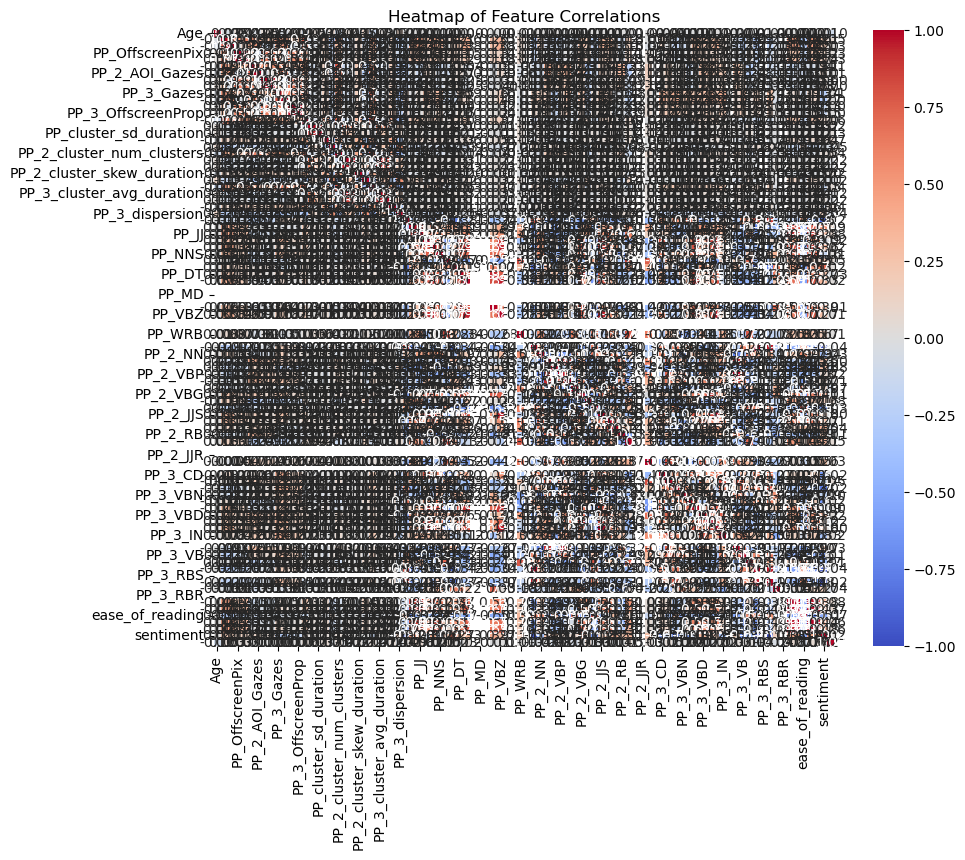

Removed features due to high correlation: {'PP_RB', 'PP_3_RB', 'wordCount_with_stopwords', 'ease_of_reading', 'PP_2_JJS', 'PP_3_IN', 'PP_3_cluster_sd_duration', 'sentiment', 'PP_2_cluster_sd_duration', 'PP_2_VBG', 'PP_DT', 'PP_2_OffscreenProp', 'PP_OffscreenProp', 'PP_2_cluster_num_clusters', 'PP_3_DT', 'PP_3_AOI_Gazes', 'PP_2_NNS', 'PP_2_MD', 'PP_3_cluster_num_clusters', 'PP_NNS', 'PP_3_NN', 'PP_2_CD', 'PP_cluster_num_clusters', 'PP_2_VBP', 'PP_2_AOI_Gazes', 'PP_2_WRB', 'PP_3_VB', 'wordCount_without_stopwords', 'PP_3_VBN', 'PP_2_VB', 'PP_3_NNS', 'PP_JJ', 'PP_3_MD', 'PP_3_VBZ', 'PP_IN', 'syllableCount_with_stopwords', 'PP_3_WRB', 'PP_2_VBZ', 'PP_WRB', 'PP_3_VBG', 'PP_3_OffscreenProp', 'syllableCount_without_stopwords', 'PP_AOI_Gazes', 'PP_cluster_sd_duration', 'PP_VBP', 'PP_3_VBD', 'PP_3_JJR', 'PP_3_cluster_avg_duration', 'PP_VBG', 'PP_VBZ', 'PP_3_CD'}
Original Data Shape: (1955, 92)
New Data Shape: (1955, 41)


In [9]:

finalDf_copy = finalDf.drop(['Participant', 'Paragraph', 'Probe'], axis=1)
correlation_matrix = finalDf_copy.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()

# Identify pairs of highly correlated features
# Threshold for removing correlated variables
threshold = 0.7
# Find and print highly correlated feature pairs
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check if correlation exceeds the threshold
            colname = correlation_matrix.columns[i]  # Get name of the correlated column
            correlated_features.add(colname)

# Remove the identified highly correlated features
finalDf_reduced = finalDf_copy.drop(labels=correlated_features, axis=1)

# Display which features were removed
print("Removed features due to high correlation:", correlated_features)

# Optionally, show the shape of the data before and after
print("Original Data Shape:", finalDf_copy.shape)
print("New Data Shape:", finalDf_reduced.shape)



In [11]:
from sklearn.linear_model import LogisticRegression

X = finalDf_reduced.drop(['TUT'], axis=1)
y = finalDf_reduced['TUT']

model = LogisticRegression(max_iter=2000)
model.fit(X, y)

# Displaying coefficients for each feature
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))


                       Feature  Coefficient
10   PP_2_cluster_avg_duration    -0.631772
7      PP_cluster_avg_duration     0.441466
12             PP_2_dispersion    -0.162236
9                PP_dispersion    -0.142643
16                       PP_NN     0.100128
27                    PP_2_VBN    -0.085332
3                   PP_2_Gazes     0.081364
28                    PP_2_VBD    -0.063280
14             PP_3_dispersion     0.063096
29                     PP_2_DT     0.060860
8     PP_cluster_skew_duration     0.055257
1                     PP_Gazes    -0.045213
2              PP_OffscreenPix     0.044174
18                      PP_VBD     0.041281
6            PP_3_OffscreenPix    -0.035895
5                   PP_3_Gazes    -0.027937
15                       PP_CD     0.023451
0                          Age    -0.017203
13  PP_3_cluster_skew_duration     0.017109
4            PP_2_OffscreenPix    -0.014890
36                    PP_3_VBP     0.013270
11  PP_2_cluster_skew_duration  

Chance Results:
Avg Accuracy: 0.55
Avg Weighted F1 Score: 0.56
Avg Precision_1: 0.32
Avg Recall_1: 0.32
Avg AUROC: 0.50
Avg Confusion Matrix:
[[175.6  88.4]
 [ 86.   41. ]]
Avg Prediction Rate: 0.33

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\grace\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Results:
Avg Accuracy: 0.59
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.35
Avg Recall_1: 0.33
Avg AUROC: 0.53
Avg Confusion Matrix:
[[188.2  75.8]
 [ 85.8  41.2]]
Avg Prediction Rate: 0.30

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
SVM Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.55
Avg Precision_1: 0.38
Avg Recall_1: 0.64
Avg AUROC: 0.58
Avg Confusion Matrix:
[[130.2 133.8]
 [ 46.2  80.8]]
Avg Prediction Rate: 0.55

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 216 candidat

<Figure size 1100x700 with 0 Axes>

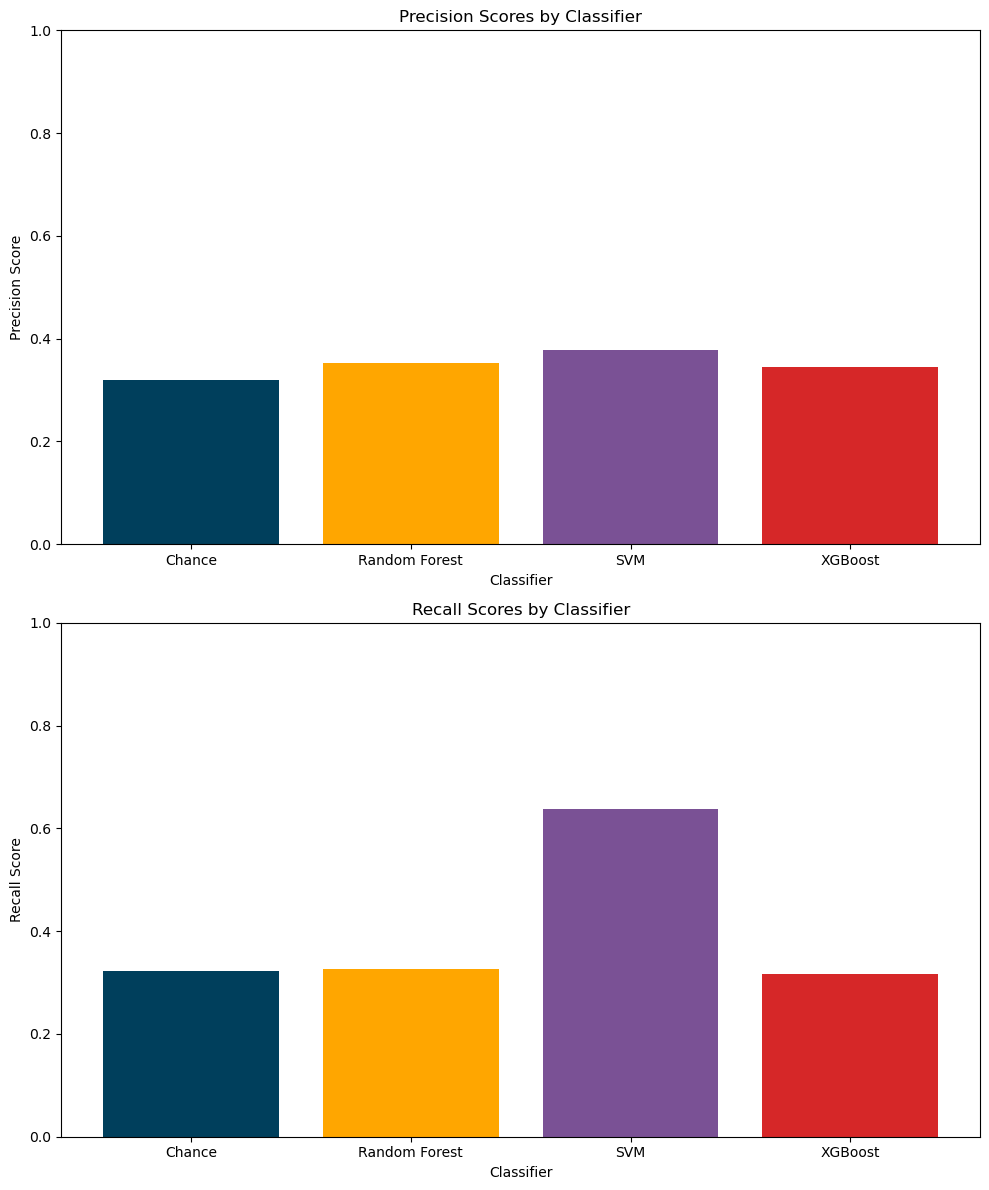

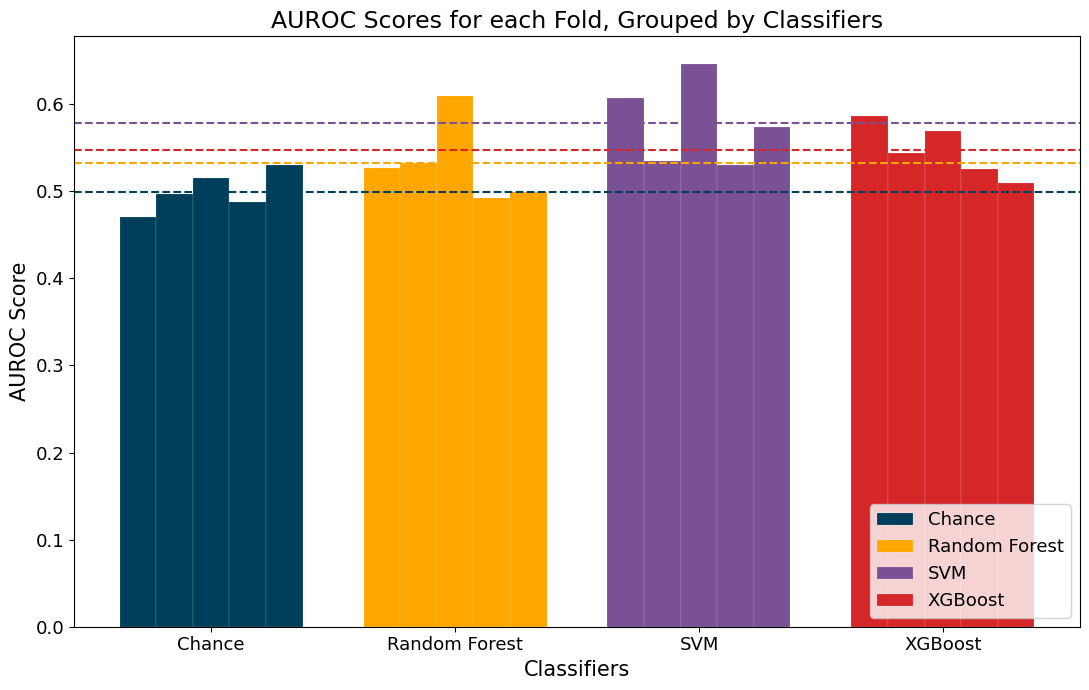

In [13]:
#RECALL- MULTICOLLINEARITY AND LOGISTIC REGRESSION
# Preparing the data
X = finalDf_reduced.drop(['PP_2_NN', 'PP_3_JJ', 'PP_2_IN', 'PP_VBN', 'PP_2_RB', 'PP_2_JJ', 'PP_3_RBS', 'PP_2_JJR', 'PP_3_JJS', 'PP_2_RBR', 'PP_MD', 'PP_2_RBS', 'PP_RBR', 'PP_JJR', 'PP_RBS', 'PP_VB', 'PP_JJS', 'PP_3_RBR'], axis=1)
y = finalDf['TUT']

# # Identify majority and minority classes
# majority_class = finalDf['TUT'].value_counts().idxmax()
# minority_class = finalDf['TUT'].value_counts().idxmin()
# print("Majority class", majority_class)
# print("Minority class", minority_class)

# # Separate majority and minority class samples
# majority_indices = finalDf[finalDf['TUT'] == majority_class].index
# minority_indices = finalDf[finalDf['TUT'] == minority_class].index

recall_scorer = make_scorer(recall_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# # Feature selection with RFECV
# selector = RFECV(RandomForestClassifier(), step=1, cv=5, scoring='accuracy')
# X_selected = selector.fit_transform(X, y)

# X = pd.DataFrame(X_selected, columns=X.columns[selector.support_])

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring=recall_scorer, n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


In [26]:
#PRECISION, LOGISTIC REGRESSION COEFFICIENT - DROPPING COLUMNS WITH SMALL COEFFICIENTS
# Preparing the data
X = finalDf.drop(['Participant', 'Paragraph', 'Probe', 'TUT', 'PP_2_NN', 'PP_RB', 'PP_3_IN', 'PP_2_VBP', 'PP_2_WRB', 'PP_VBN', 'PP_2_IN', 'PP_2_Gazes', 'PP_VBG', 'PP_3_RB',
    'PP_NNS', 'PP_2_NNS', 'PP_IN', 'PP_3_VBZ', 'PP_2_CD', 'PP_3_JJR', 'sentiment', 'PP_2_JJ', 'PP_3_NNS', 'PP_VBP',
    'PP_3_CD', 'PP_VBZ', 'PP_2_RB', 'PP_3_JJ', 'PP_2_MD', 'PP_3_VBN', 'PP_WRB', 'PP_2_JJS', 'PP_3_DT',
    'PP_2_cluster_num_clusters', 'PP_3_VBD', 'PP_cluster_num_clusters', 'PP_3_cluster_num_clusters', 'PP_MD', 'PP_JJS',
    'PP_3_RBR', 'PP_2_JJR', 'PP_VB', 'PP_3_RBS', 'PP_RBS', 'PP_JJR', 'PP_2_RBS', 'PP_3_JJS', 'PP_2_RBR', 'PP_RBR'], axis=1)
y = finalDf['TUT']

# Identify majority and minority classes
majority_class = finalDf['TUT'].value_counts().idxmax()
minority_class = finalDf['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = finalDf[finalDf['TUT'] == majority_class].index
minority_indices = finalDf[finalDf['TUT'] == minority_class].index

precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Feature selection with RFECV
selector = RFECV(RandomForestClassifier(), step=1, cv=5, scoring='accuracy')
X_selected = selector.fit_transform(X, y)

X = pd.DataFrame(X_selected, columns=X.columns[selector.support_])

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring=precision_scorer, n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


Majority class 0
Minority class 1


KeyboardInterrupt: 

<Figure size 1100x700 with 0 Axes>

# DATA MODELING

In [20]:
finalDf = pd.read_csv('NLP_gaze_fixation_age.csv')

Majority class 0
Minority class 1
Chance Results:
Avg Accuracy: 0.58
Avg Weighted F1 Score: 0.58
Avg Precision_1: 0.34
Avg Recall_1: 0.33
Avg AUROC: 0.49
Avg Confusion Matrix:
[[184.6  79.4]
 [ 85.2  41.8]]
Avg Prediction Rate: 0.31

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.34
Avg Recall_1: 0.33
Avg AUROC: 0.50
Avg Confusion Matrix:
[[180.6  83.4]
 [ 85.   42. ]]
Avg Prediction Rate: 0.32

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5

<Figure size 1100x700 with 0 Axes>

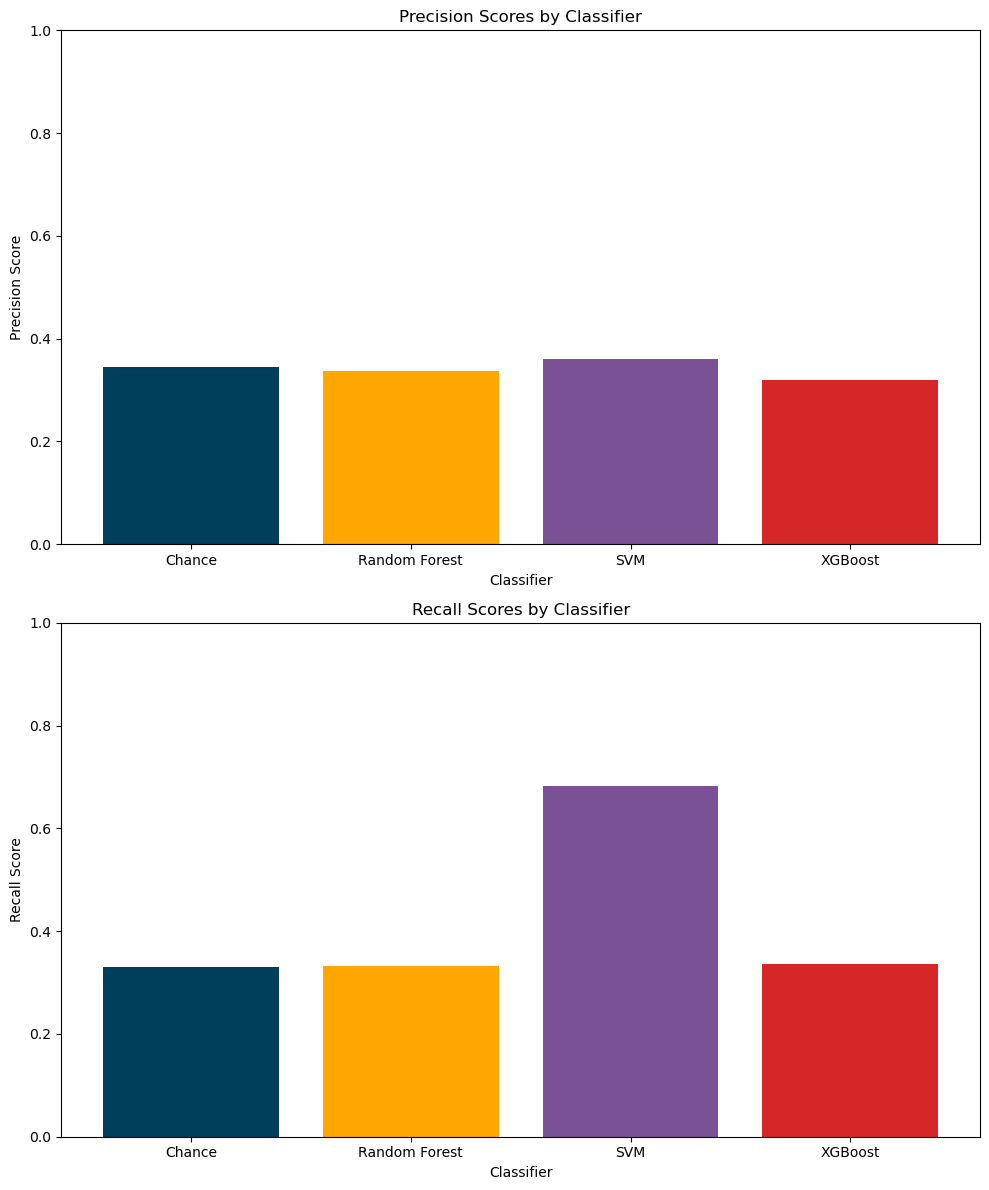

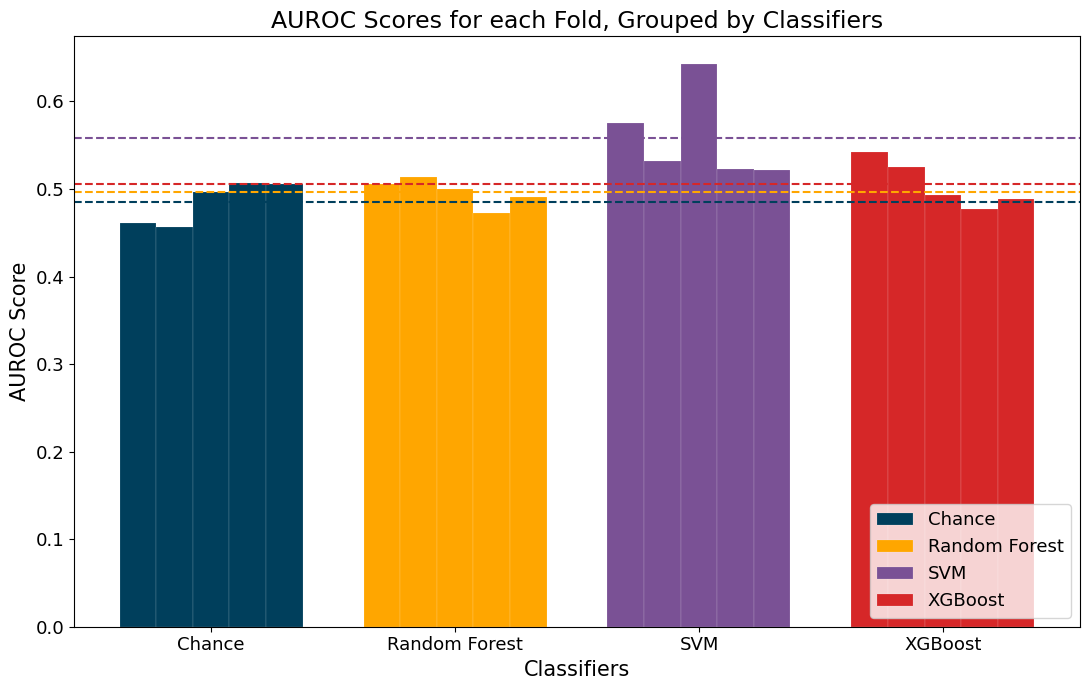

In [7]:
#PRECISION
# Preparing the data
X = finalDf.drop(['Participant', 'Paragraph', 'Probe', 'TUT'], axis=1)
y = finalDf['TUT']

# Identify majority and minority classes
majority_class = finalDf['TUT'].value_counts().idxmax()
minority_class = finalDf['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = finalDf[finalDf['TUT'] == majority_class].index
minority_indices = finalDf[finalDf['TUT'] == minority_class].index

precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Feature selection with RFECV
selector = RFECV(RandomForestClassifier(), step=1, cv=5, scoring='accuracy')
X_selected = selector.fit_transform(X, y)

X = pd.DataFrame(X_selected, columns=X.columns[selector.support_])

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=finalDf['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=0.95)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring=precision_scorer, n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()
